In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\VICTUS\Downloads\SVM (1)\SVM\mushroom.csv")

In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df.head()

cap_shape cap_surface cap_color bruises   odor gill_attachment gill_spacing  \
0    sunken       scaly     white      no  anise      descending      distant   
1    sunken     fibrous       red      no  anise         notched      crowded   
2      flat     grooves    purple     yes   foul      descending      crowded   
3      bell       scaly      pink     yes  fishy         notched        close   
4      flat      smooth    yellow     yes  musty            free      crowded   

  gill_size gill_color stalk_shape  ...  veil_type veil_color ring_number  \
0     broad       pink    tapering  ...    partial      brown         two   
1    narrow  chocolate   enlarging  ...  universal      brown         two   
2     broad     purple    tapering  ...  universal     yellow         two   
3     broad     orange   enlarging  ...    partial     yellow         two   
4    narrow     orange   enlarging  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 25 columns]

In [5]:
df.dtypes

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [6]:
df.isna().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [7]:
df.duplicated().sum()

1024

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df.describe()

stalk_height  cap_diameter
count    976.000000    976.000000
mean       8.524684     12.598566
std        3.703043      6.987077
min        2.000000      1.000000
25%        5.326820      6.141161
50%        8.367245     12.626094
75%       11.758624     18.559780
max       15.095066     25.000054

In [11]:
df.describe(include=object)

cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count        976         976       976     976   976             976   
unique         5           4         9       2     9               4   
top       sunken       scaly     brown     yes  foul            free   
freq         216         292       127     502   126             270   

       gill_spacing gill_size gill_color stalk_shape  ...  \
count           976       976        976         976  ...   
unique            3         2         12           2  ...   
top         crowded    narrow      green   enlarging  ...   
freq            330       498         96         524  ...   

       stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
count                     976                    976        976        976   
unique                      9                      9          2          4   
top                     brown                 yellow  universal      white   
freq                      127                    118        500        273   

       ring_number  ring_type spore_print_color population habitat      class  
count          976        976               976        976     976        976  
unique           3          8                 9          6       7          2  
top           none  sheathing             brown   abundant   urban  poisonous  
freq           342        135               122        176     153        618  

[4 rows x 23 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    object 
 1   cap_surface               976 non-null    object 
 2   cap_color                 976 non-null    object 
 3   bruises                   976 non-null    object 
 4   odor                      976 non-null    object 
 5   gill_attachment           976 non-null    object 
 6   gill_spacing              976 non-null    object 
 7   gill_size                 976 non-null    object 
 8   gill_color                976 non-null    object 
 9   stalk_shape               976 non-null    object 
 10  stalk_root                976 non-null    object 
 11  stalk_surface_above_ring  976 non-null    object 
 12  stalk_surface_below_ring  976 non-null    object 
 13  stalk_color_above_ring    976 non-null    object 
 14  stalk_colo

# Visualization

# Count Plot

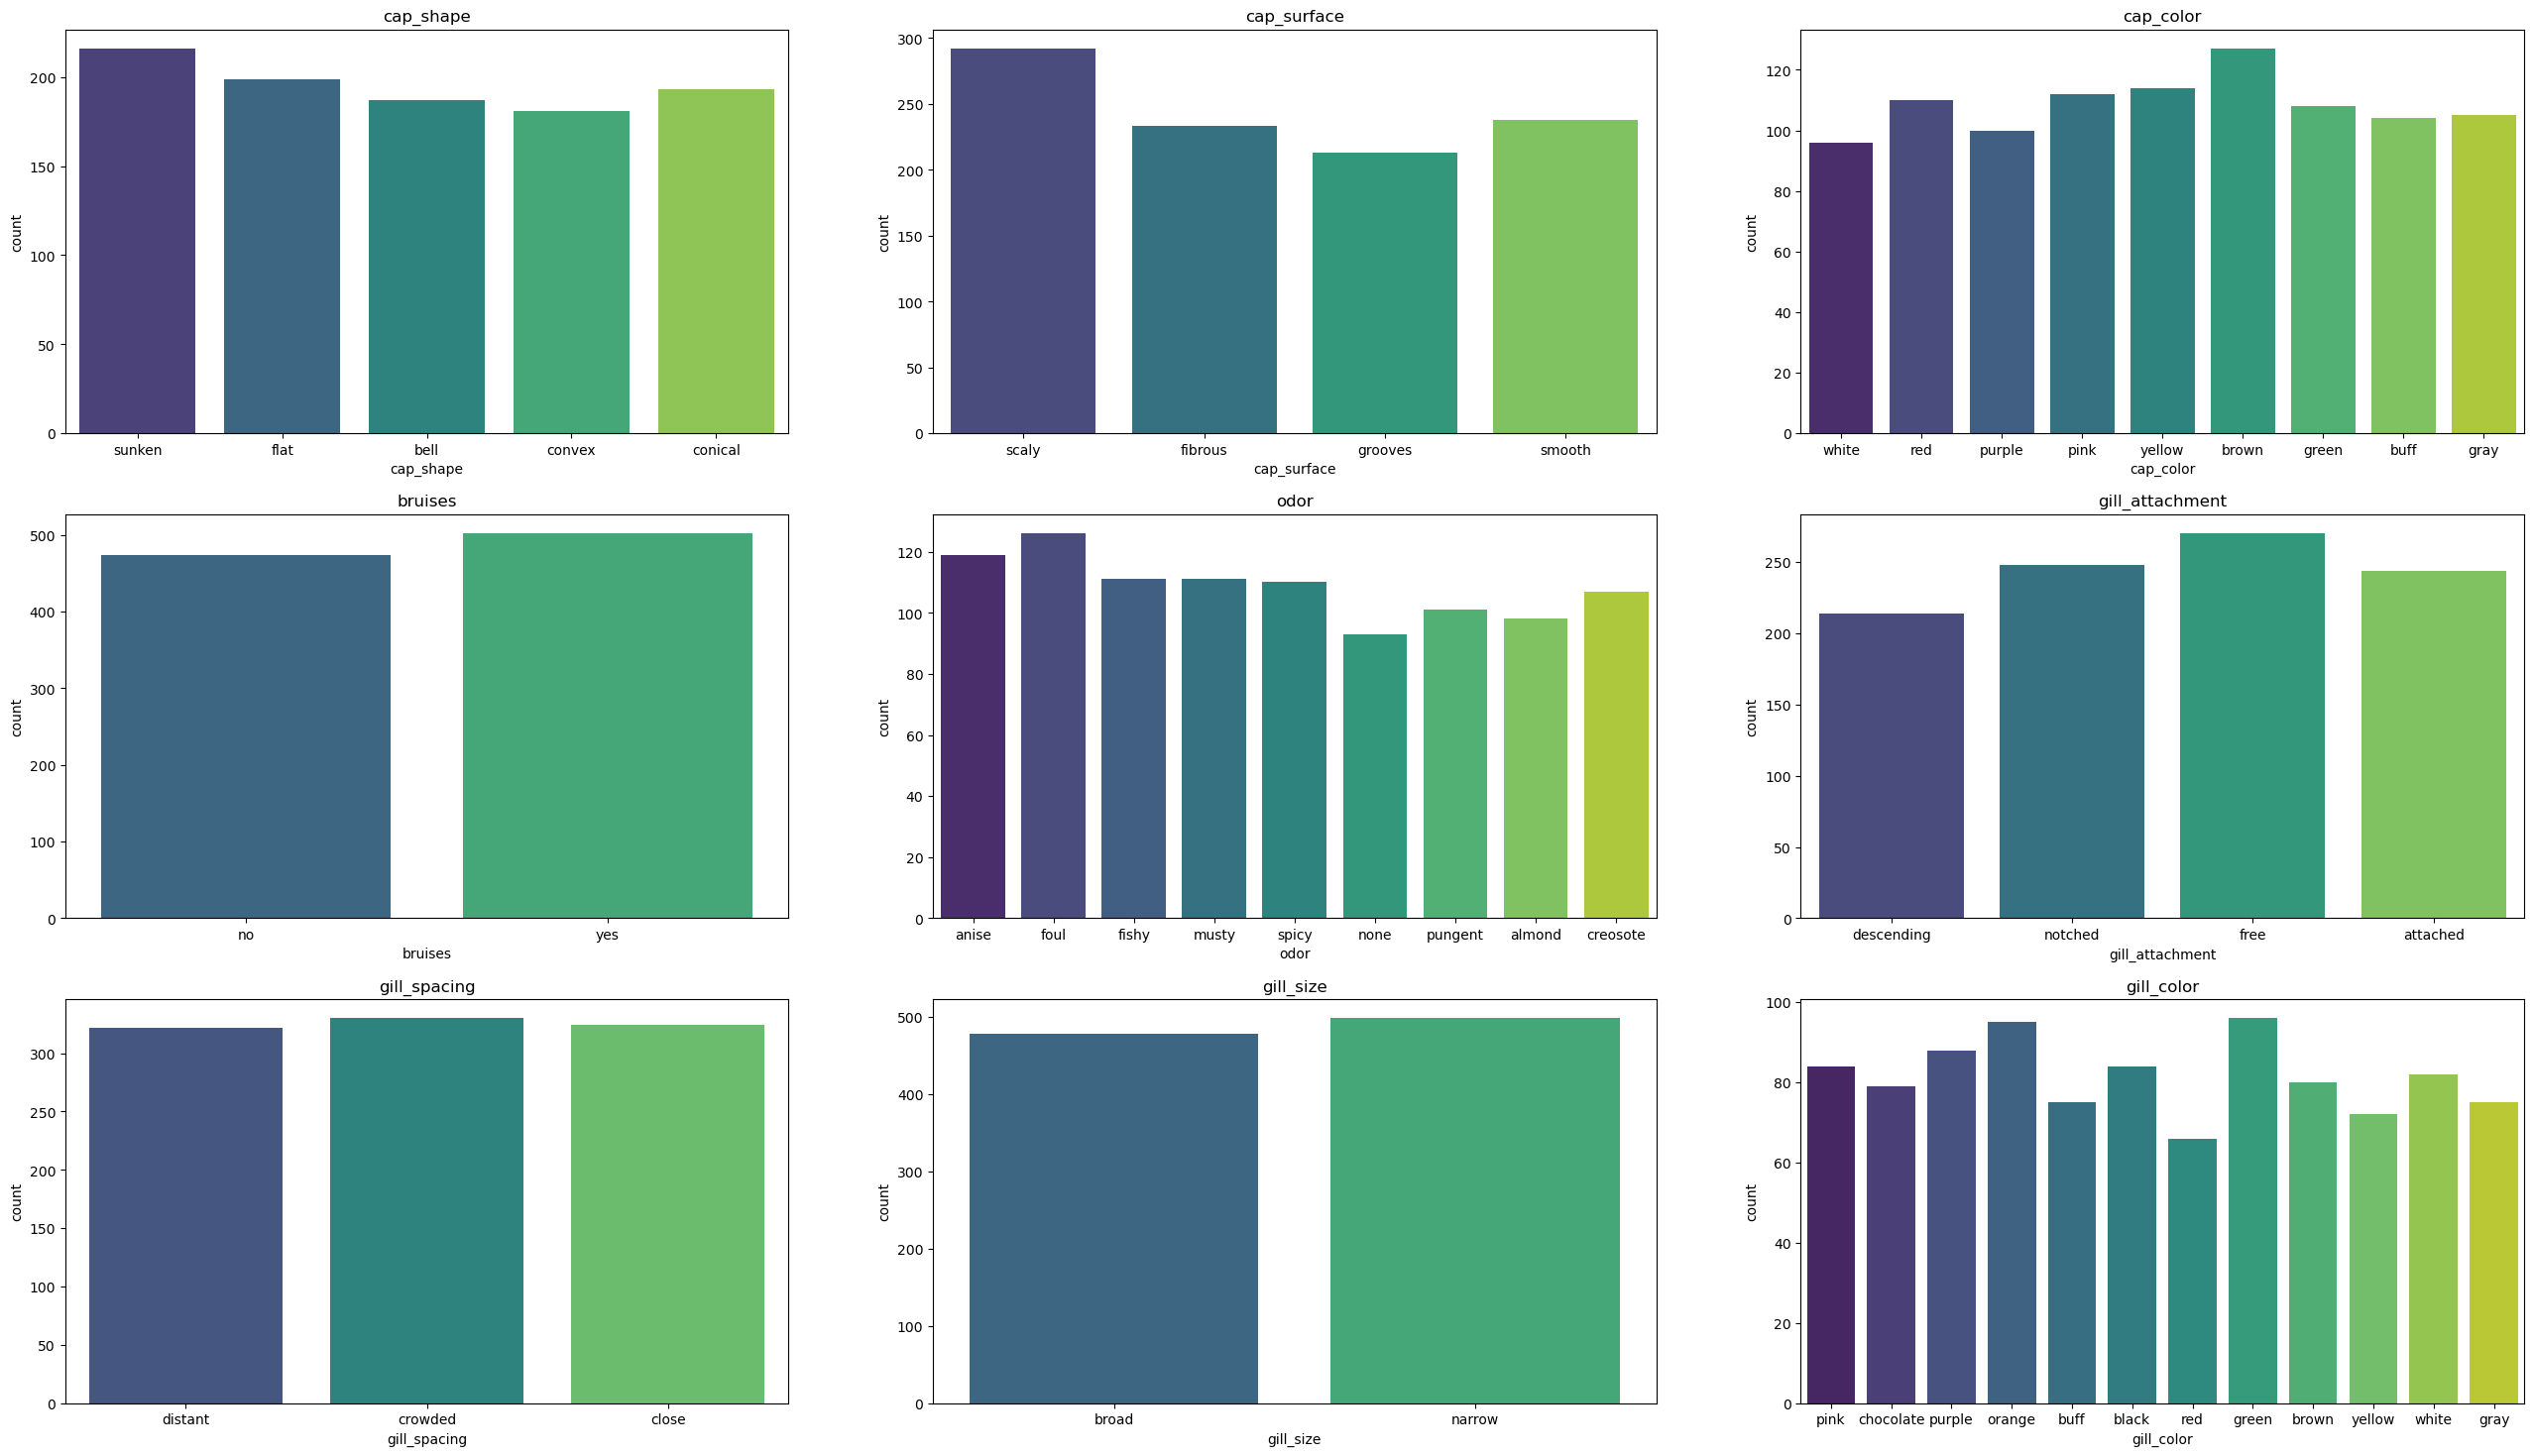

In [13]:
plt.figure(figsize=(32,18))
categorical_columns = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size','gill_color']
for i, column in enumerate(categorical_columns,1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df,palette='viridis')
    plt.title(f'{column}')

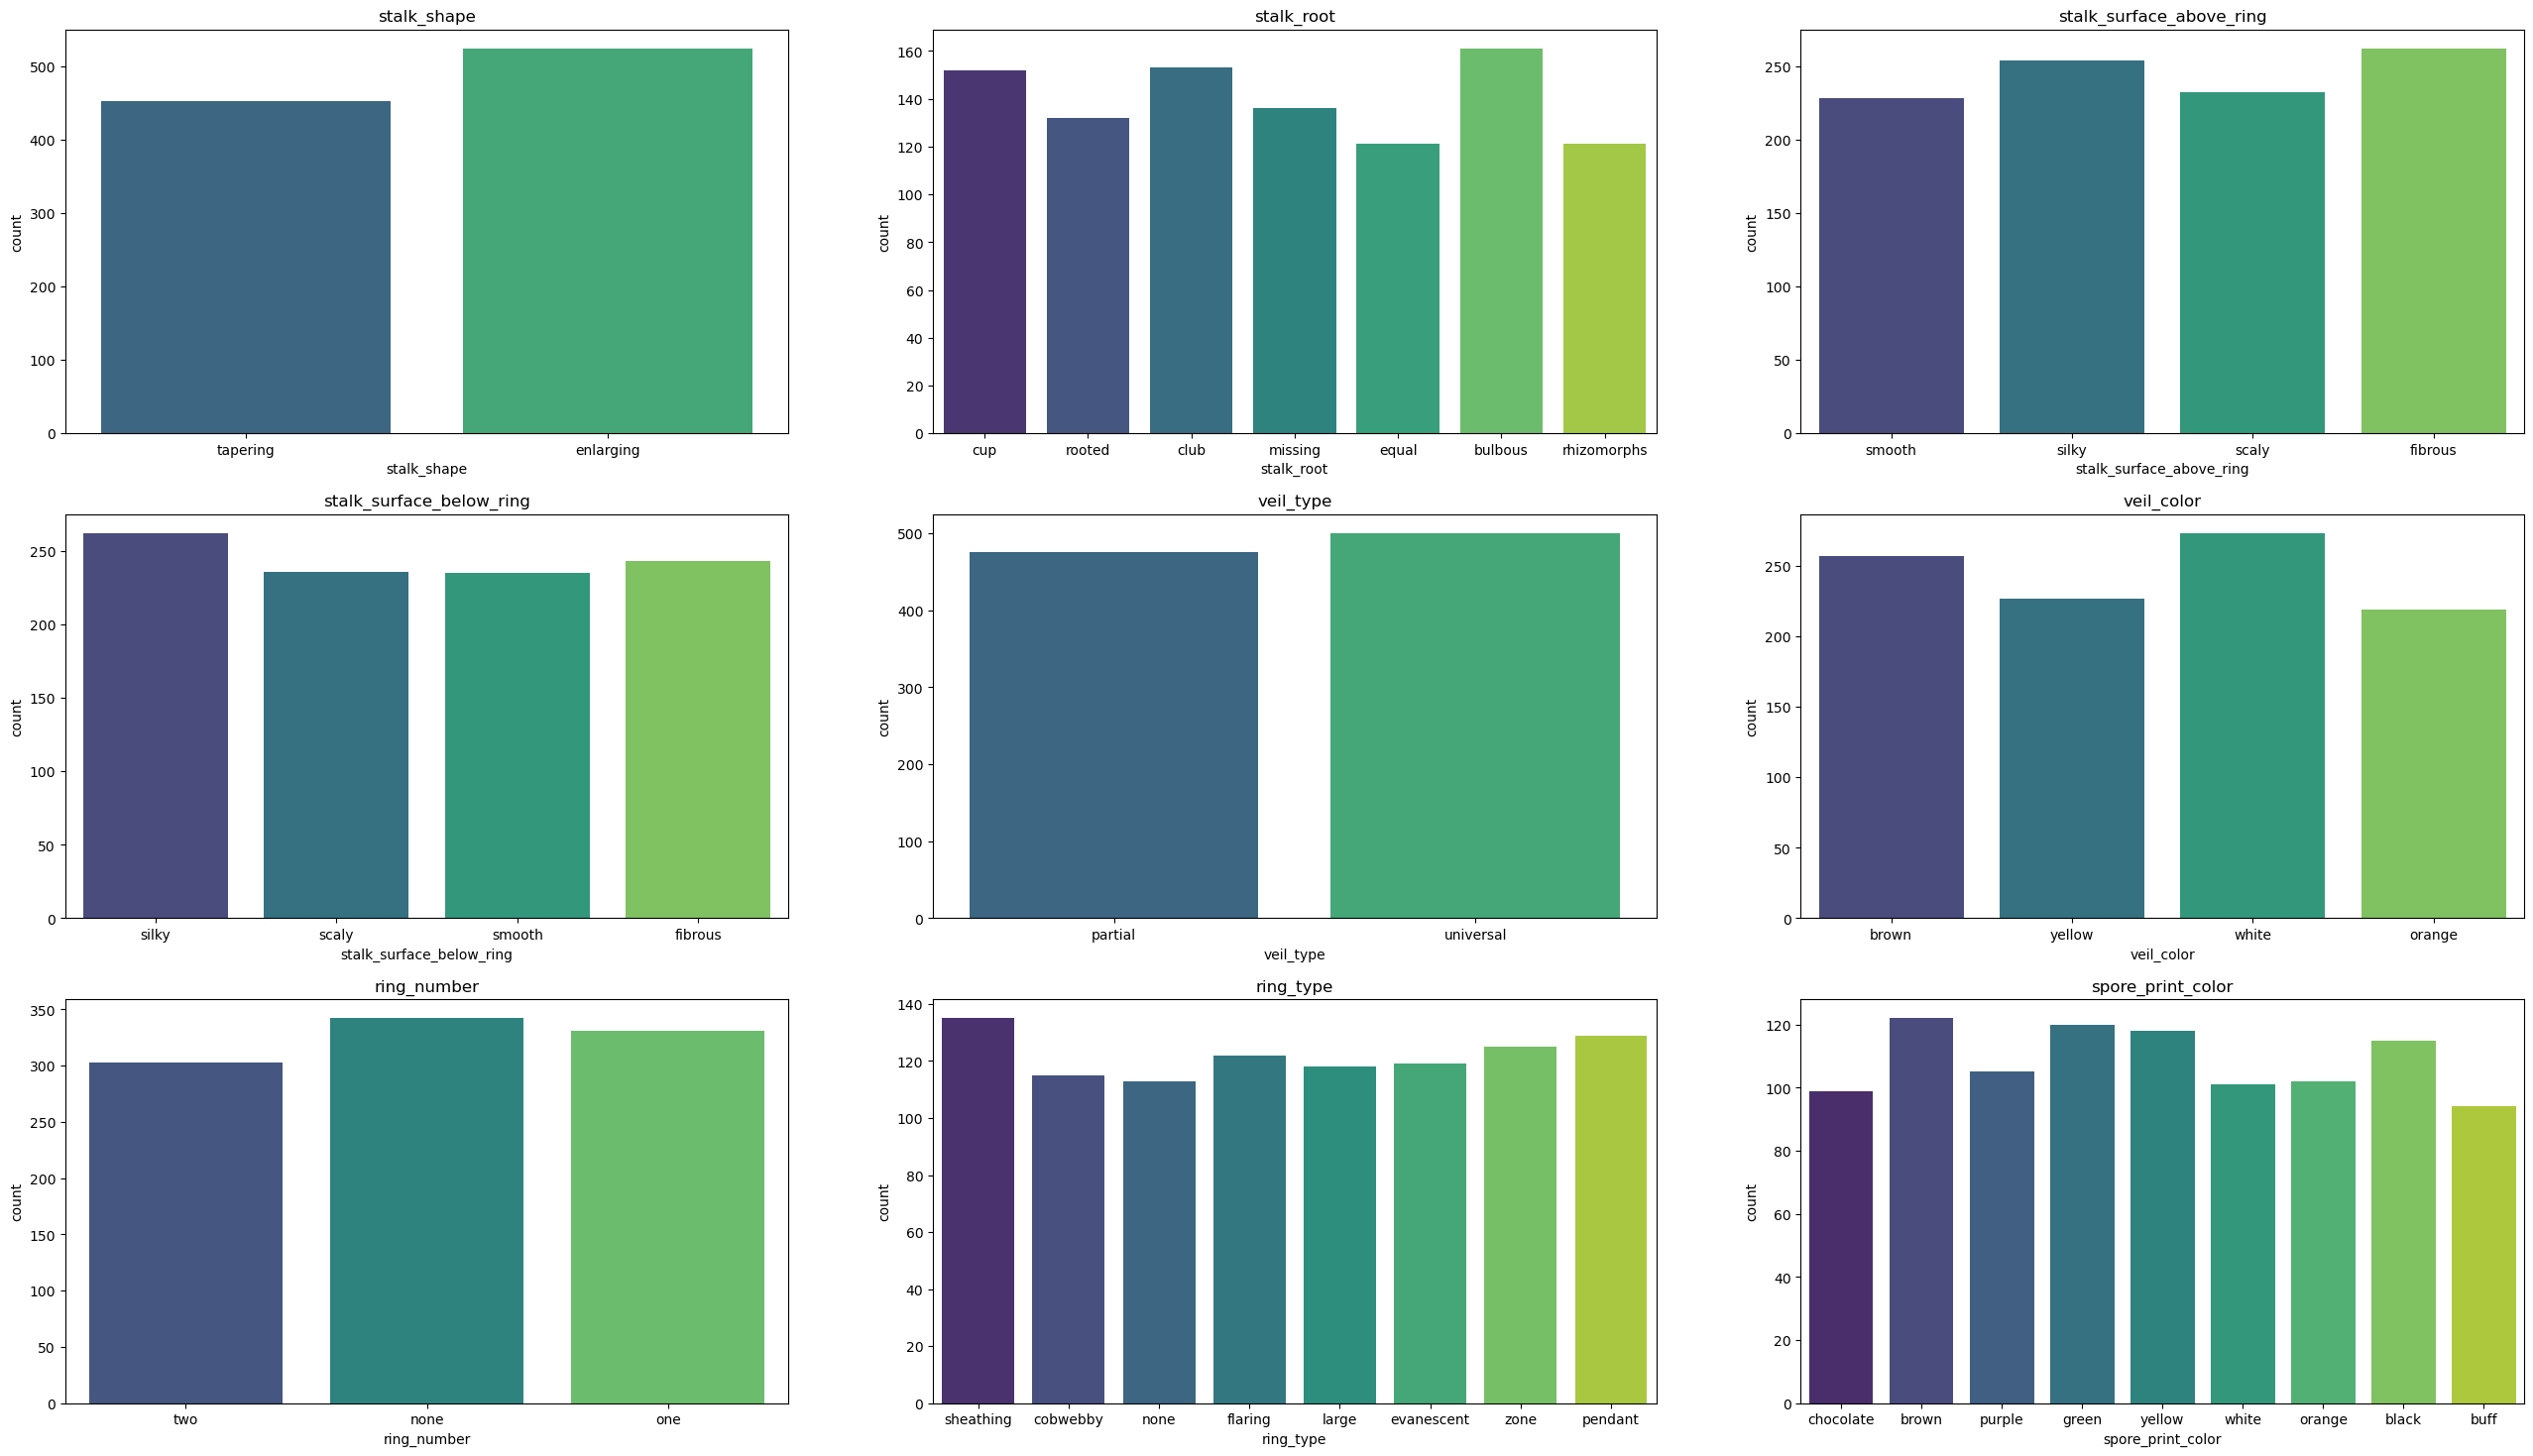

In [14]:
plt.figure(figsize=(32,18))
column = ['stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','veil_type','veil_color','ring_number','ring_type',
                      'spore_print_color']
for i, column in enumerate(column, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df,palette='viridis')
    plt.title(f'{column}')

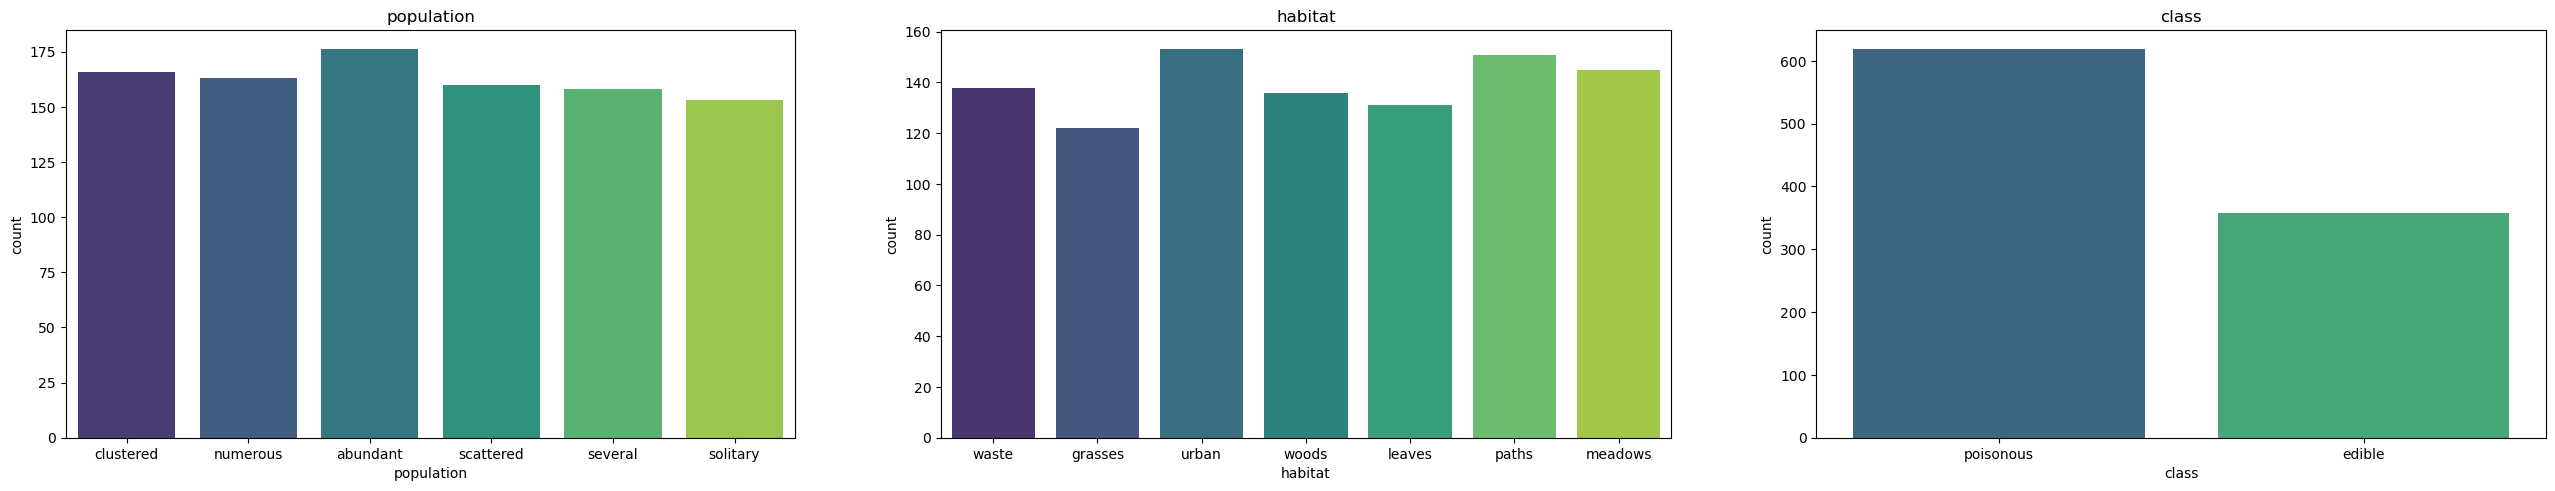

In [15]:
plt.figure(figsize=(32,18))
column = ['population','habitat','class']
for i, column in enumerate(column, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df,palette='viridis')
    plt.title(f'{column}')

# Histogram

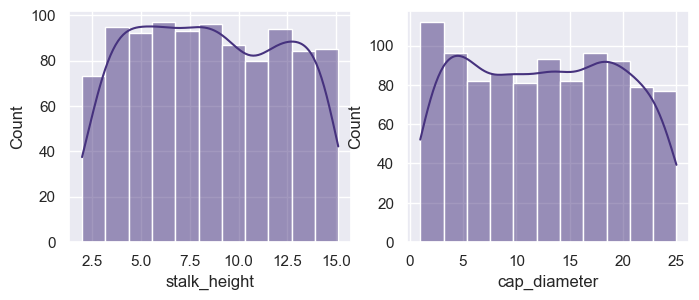

In [16]:
plt.figure(figsize=(8,3))
sns.set_theme(style='darkgrid',palette='viridis')
plt.subplot(1,2,1)
sns.histplot(df['stalk_height'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['cap_diameter'],kde=True)
plt.show()

# Box Plot

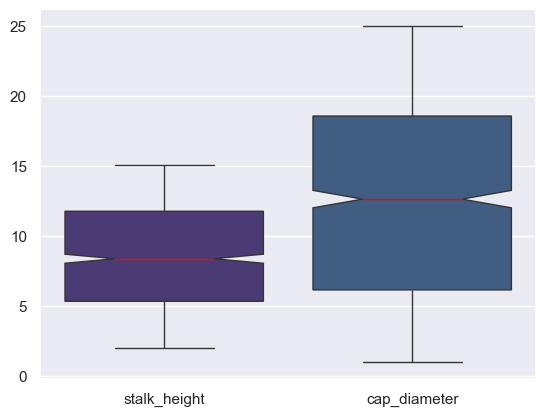

In [17]:
sns.boxplot(df,notch=True,medianprops={'color':'r'})
plt.show()

# Coorelation Metrics

In [18]:
df.corr(numeric_only=True)

stalk_height  cap_diameter
stalk_height      1.000000     -0.034891
cap_diameter     -0.034891      1.000000

<Axes: >

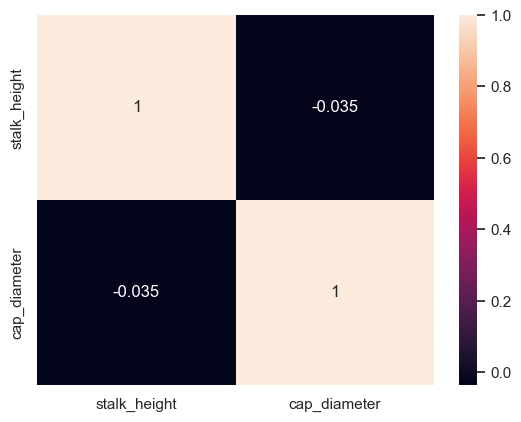

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing

# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
LE = LabelEncoder()

In [22]:
Cat_Col = df.select_dtypes(include=object)

In [23]:
for column in Cat_Col.columns:
    Cat_Col[column] = LE.fit_transform(Cat_Col[column])

In [24]:
Cat_Col

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0            4            2          7        0     1                1   
1            4            0          6        0     1                3   
2            3            1          5        1     4                1   
3            0            2          4        1     3                3   
4            3            3          8        1     5                2   
..         ...          ...        ...      ...   ...              ...   
971          1            1          0        0     4                3   
972          0            1          4        1     1                1   
973          4            3          5        1     1                1   
974          4            2          5        1     5                0   
975          2            2          8        1     7                1   

     gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0               2          0           7            1  ...   
1               1          1           3            0  ...   
2               1          0           8            1  ...   
3               0          0           6            0  ...   
4               1          1           6            0  ...   
..            ...        ...         ...          ...  ...   
971             1          0           3            1  ...   
972             2          0           1            0  ...   
973             1          1           2            1  ...   
974             2          1           9            1  ...   
975             0          1           8            0  ...   

     stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                         3                       8          0           0   
1                         2                       0          1           0   
2                         8                       3          1           3   
3                         8                       5          0           3   
4                         3                       7          1           2   
..                      ...                     ...        ...         ...   
971                       6                       8          1           0   
972                       5                       5          0           0   
973                       0                       6          1           1   
974                       5                       4          0           2   
975                       3                       0          0           2   

     ring_number  ring_type  spore_print_color  population  habitat  class  
0              2          6                  3           1        5      1  
1              2          6                  1           2        5      0  
2              2          6                  6           0        5      1  
3              2          0                  4           1        0      1  
4              0          4                  8           1        4      1  
..           ...        ...                ...         ...      ...    ...  
971            0          3                  1           2        3      0  
972            2          5                  8           2        0      1  
973            2          4                  5           0        0      0  
974            1          7                  8           2        5      1  
975            2          3                  7           2        4      1  

[976 rows x 23 columns]

In [25]:
Num_Col = df[['stalk_height','cap_diameter']]

In [26]:
Num_Col

stalk_height  cap_diameter
0       14.276173      5.054983
1        3.952715     19.068319
2        9.054265      7.205884
3        5.226499     20.932692
4       14.037532     12.545245
..            ...           ...
971     13.020616      9.993008
972      3.751597     18.868135
973     13.134058     15.740028
974      6.500840     13.501957
975     13.066414     21.056642

[976 rows x 2 columns]

# Standardized

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
Sc = StandardScaler()

In [29]:
x = Sc.fit_transform(Num_Col)

In [30]:
x

array([[ 1.55397552, -1.08020133],
       [-1.23528506,  0.92643459],
       [ 0.14308581, -0.77220366],
       ...,
       [ 1.24539141,  0.44984086],
       [-0.54681571,  0.12936088],
       [ 1.22711479,  1.21115202]])

In [31]:
NUM_COL = pd.DataFrame(x,columns=Num_Col.columns)

In [32]:
NUM_COL

stalk_height  cap_diameter
0        1.553976     -1.080201
1       -1.235285      0.926435
2        0.143086     -0.772204
3       -0.891126      1.193403
4        1.489498     -0.007635
..            ...           ...
971      1.214741     -0.373102
972     -1.289624      0.897769
973      1.245391      0.449841
974     -0.546816      0.129361
975      1.227115      1.211152

[976 rows x 2 columns]

In [33]:
Final_Data = pd.concat([Cat_Col,NUM_COL],axis=1)

In [34]:
Final_Data

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0            4            2          7        0     1                1   
1            4            0          6        0     1                3   
2            3            1          5        1     4                1   
3            0            2          4        1     3                3   
4            3            3          8        1     5                2   
..         ...          ...        ...      ...   ...              ...   
971          1            1          0        0     4                3   
972          0            1          4        1     1                1   
973          4            3          5        1     1                1   
974          4            2          5        1     5                0   
975          2            2          8        1     7                1   

     gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0               2          0           7            1  ...          0   
1               1          1           3            0  ...          1   
2               1          0           8            1  ...          1   
3               0          0           6            0  ...          0   
4               1          1           6            0  ...          1   
..            ...        ...         ...          ...  ...        ...   
971             1          0           3            1  ...          1   
972             2          0           1            0  ...          0   
973             1          1           2            1  ...          1   
974             2          1           9            1  ...          0   
975             0          1           8            0  ...          0   

     veil_color  ring_number  ring_type  spore_print_color  population  \
0             0            2          6                  3           1   
1             0            2          6                  1           2   
2             3            2          6                  6           0   
3             3            2          0                  4           1   
4             2            0          4                  8           1   
..          ...          ...        ...                ...         ...   
971           0            0          3                  1           2   
972           0            2          5                  8           2   
973           1            2          4                  5           0   
974           2            1          7                  8           2   
975           2            2          3                  7           2   

     habitat  class  stalk_height  cap_diameter  
0          5      1      1.553976     -1.080201  
1          5      0     -1.235285      0.926435  
2          5      1      0.143086     -0.772204  
3          0      1     -0.891126      1.193403  
4          4      1      1.489498     -0.007635  
..       ...    ...           ...           ...  
971        3      0      1.214741     -0.373102  
972        0      1     -1.289624      0.897769  
973        0      0      1.245391      0.449841  
974        5      1     -0.546816      0.129361  
975        4      1      1.227115      1.211152  

[976 rows x 25 columns]

In [35]:
Final_Data['class'].value_counts()

class
1    618
0    358
Name: count, dtype: int64

In [36]:
from sklearn.utils import resample

In [37]:
majority_class = Final_Data[Final_Data['class'] == 1]
minority_class = Final_Data[Final_Data['class']==0]

In [38]:
minority_oversampled = resample(minority_class,replace=True,n_samples=len(majority_class),random_state=42)

In [39]:
balanced_data = pd.concat([majority_class,minority_oversampled])

In [40]:
balanced_data['class'].value_counts()

class
1    618
0    618
Name: count, dtype: int64

In [41]:
balanced_data.reset_index(inplace=True)

In [42]:
x = balanced_data.drop(columns=['class'])

In [43]:
y = balanced_data['class']

In [44]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1231    0
1232    0
1233    0
1234    0
1235    0
Name: class, Length: 1236, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Scatter Plot

<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

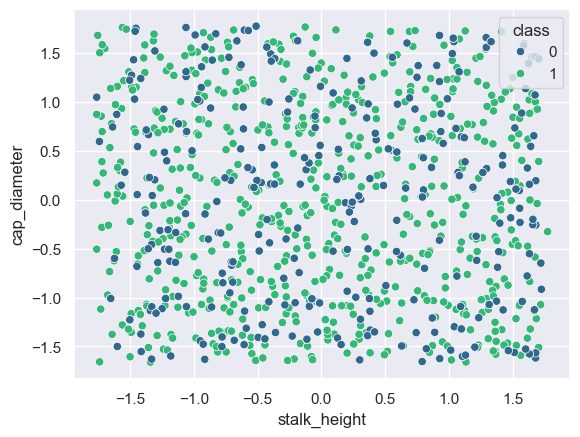

In [47]:
sns.scatterplot(x = balanced_data['stalk_height'], y = balanced_data['cap_diameter'], hue=y,palette='viridis')

# Plotly

In [48]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [49]:
import plotly.express as pe

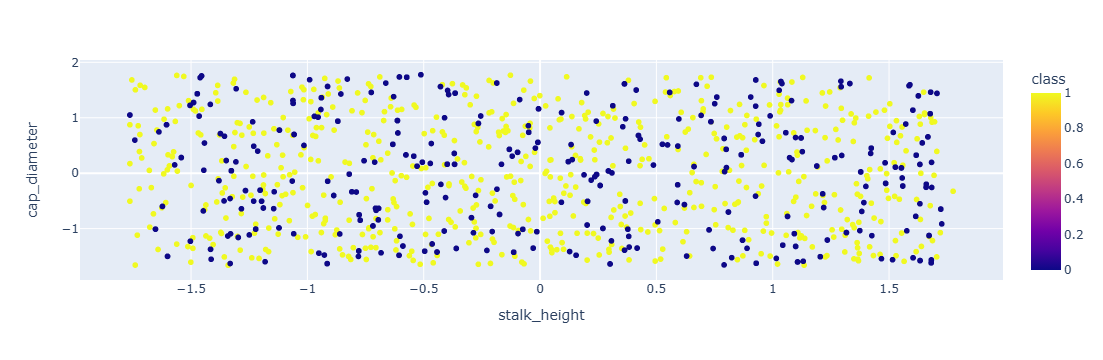

In [50]:
pe.scatter(balanced_data , x = balanced_data['stalk_height'], y = balanced_data['cap_diameter'] ,color='class')

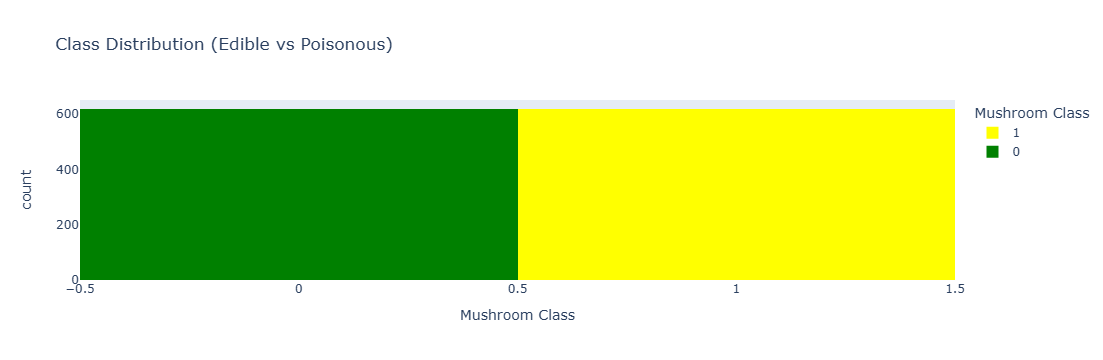

In [51]:
fig = pe.histogram(balanced_data, x='class', title='Class Distribution (Edible vs Poisonous)', 
                   labels={'class':'Mushroom Class'}, 
                   color='class', 
                   color_discrete_map={0: 'green', 1: 'yellow'})
fig.show()


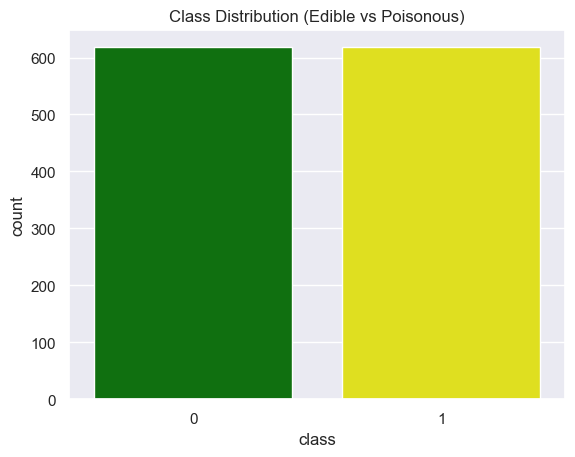

In [52]:
sns.countplot(x='class',data = balanced_data,palette=['green','yellow'])
plt.title('Class Distribution (Edible vs Poisonous)')
plt.show()

# Model Building

In [53]:
from sklearn.svm import SVC 

In [54]:
classifier = SVC()

In [55]:
classifier.fit(x_train,y_train)

SVC()

In [56]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0])

In [57]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [58]:
print('Accuracy_Score:-',accuracy_score(y_test,y_pred))
print('Classificatioin_Report:-',classification_report(y_test,y_pred))

Accuracy_Score:- 0.4959677419354839
Classificatioin_Report:-               precision    recall  f1-score   support

           0       0.48      0.76      0.58       116
           1       0.56      0.27      0.36       132

    accuracy                           0.50       248
   macro avg       0.52      0.51      0.47       248
weighted avg       0.52      0.50      0.46       248



# Visualization of SVM Result

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=2)

In [61]:
x_test_pca = pca.fit_transform(x_test)

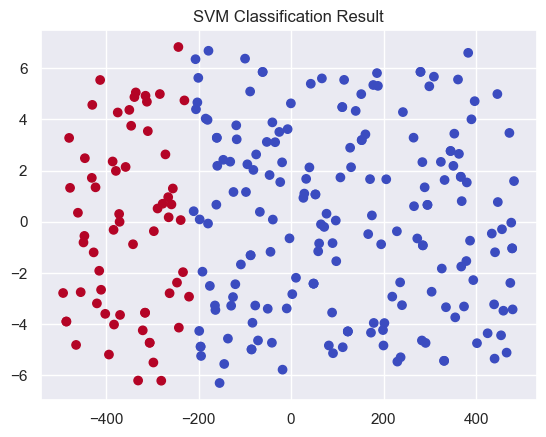

In [62]:
plt.scatter(x_test_pca[:,0],x_test_pca[:,1],c=y_pred,cmap='coolwarm')
plt.title('SVM Classification Result')
plt.show()

# Hyperparameter Tuning

In [63]:
parameter = {'kernel':['ploy','rbf','sigmoid'],'C':[0.1,1.0,10]}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
HYP_Model = GridSearchCV(classifier,param_grid=parameter,cv=5,refit=True,verbose=2)

In [66]:
HYP_Model.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=0.1, kernel=ploy; total time=   0.0s
[CV] END .................................C=0.1, kernel=ploy; total time=   0.0s
[CV] END .................................C=0.1, kernel=ploy; total time=   0.0s
[CV] END .................................C=0.1, kernel=ploy; total time=   0.0s
[CV] END .................................C=0.1, kernel=ploy; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..............................C=0.1, ker

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10],
                         'kernel': ['ploy', 'rbf', 'sigmoid']},
             verbose=2)

In [67]:
HYP_Model.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [68]:
Y = HYP_Model.predict(x_test)

In [69]:
accuracy_score(y_test,Y)

0.4959677419354839

# Comparison and Analysis

# Polynomial Kernel

In [70]:
classifier1 = SVC(kernel='poly')

In [71]:
classifier1.fit(x_train,y_train)

SVC(kernel='poly')

In [72]:
Y_PRED = classifier1.predict(x_test)

In [73]:
print('Classification_Report:-',classification_report(y_test,Y_PRED))

Classification_Report:-               precision    recall  f1-score   support

           0       0.47      1.00      0.64       116
           1       0.00      0.00      0.00       132

    accuracy                           0.47       248
   macro avg       0.23      0.50      0.32       248
weighted avg       0.22      0.47      0.30       248



# Linear Kernel

In [74]:
classifier2 = SVC(kernel='linear')

In [75]:
classifier2.fit(x_train,y_train)
Y = classifier2.predict(x_test)
print('Classification_Report:-',classification_report(y_test,Y))

Classification_Report:-               precision    recall  f1-score   support

           0       0.44      0.49      0.46       116
           1       0.50      0.44      0.47       132

    accuracy                           0.46       248
   macro avg       0.47      0.47      0.46       248
weighted avg       0.47      0.46      0.46       248



# RBF Kernel

In [76]:
classifier3 = SVC(kernel='rbf')
classifier3.fit(x_train,y_train)
Y1 = classifier3.predict(x_test)
print('Classification_Report:-',classification_report(y_test,Y1))

Classification_Report:-               precision    recall  f1-score   support

           0       0.48      0.76      0.58       116
           1       0.56      0.27      0.36       132

    accuracy                           0.50       248
   macro avg       0.52      0.51      0.47       248
weighted avg       0.52      0.50      0.46       248



# Sigmoid Kernel 

In [77]:
classifier4 = SVC(kernel='sigmoid')
classifier4.fit(x_train,y_train)
Y2 = classifier4.predict(x_test)
print('Classification_Report:-',classification_report(y_test,Y2))

Classification_Report:-               precision    recall  f1-score   support

           0       0.46      0.52      0.49       116
           1       0.53      0.47      0.50       132

    accuracy                           0.49       248
   macro avg       0.49      0.49      0.49       248
weighted avg       0.50      0.49      0.49       248

